# Очистка данных и предобработка
Этапы:
* Работа с пропущенными значениями.
* Очистка данных от выбросов.
* Удаление признаков и записей, которые не несут полезной информации.

Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sber_data = pd.read_csv('data/sber_data.csv', sep=',')
display(sber_data.tail(5))

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


# Задание 2.4

Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

In [43]:
# Данные
box_data = sber_data.groupby(by=['price_doc', 'ecology'], as_index=False)['ecology'].value_counts()
# display(box_data)

# Коробчатая диаграмма
fig_box = px.box(
    data_frame=box_data,
    y='ecology',
    x='price_doc'
)

fig_box.show()

# Задание 2.5
Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.

In [44]:
# Данные
scatter_data = sber_data.groupby(by=['price_doc', 'kremlin_km'], as_index=False)['kremlin_km'].value_counts()
# display(scatter_data)

# Коробчатая диаграмма
fig_scatter = px.scatter(
    data_frame=scatter_data,
    x='kremlin_km',
    y='price_doc',
    color='price_doc'
)

fig_scatter.show()

# Предобработка пропусков (NAN) в данных
Чем так плохи пропуски, почему так важно их предобработать?

Ответ очень прост: преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку.


ПРИЧИНЫ ПОЯВЛЕНИЯ ПРОПУСКОВ В ДАННЫХ

* Ошибка ввода данных. Как правило, такая ошибка обусловлена человеческим фактором: никто не застрахован от случайного пропуска графы при заполнении данных.
* Ошибка передачи данных. Эта причина на сегодняшний момент возникает довольно редко: с появлением протоколов проверки выгружаемой информации потерять данные при передаче их по сети становится сложнее, но вероятность такого события ненулевая.
* Намеренное сокрытие информации. Одна из самых распространённых причин, особенно в социологических опросах. Дело в том, что пользователи/опрашиваемые/клиенты часто скрывают информацию о себе. Например, люди, занимающие высокие должности, могут быть связаны контрактом о неразглашении своих доходов.
* Прямое отсутствие информации. Эта причина очень распространена в данных для рекомендательных систем. Представьте, что у нас есть таблицы фильмов и пользователей, которые просматривают их и ставят им оценки. Мы объединяем всю информацию в одну большую сводную таблицу: например, по строкам идут пользователи, а по столбцам — фильмы. Но вот незадача: у нас нет информации о рейтингах фильмов, которые пользователь ещё не посмотрел. В таком случае на пересечении строки с именем пользователя и столбца с названием фильма, который он ещё не смотрел, ставится пропуск. Главное несчастье состоит в том, что 99 % процентов такой таблицы — это сплошной пропуск.
* Мошенничество. Очень острая проблема в финансовой сфере, особенно в банковских данных. Мошенники нередко указывают ложную информацию или не указывают её вовсе.

Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски скрыты.

Ячейки с пропуском могут быть помечены специальным символом, например “?” или “no data”).

In [45]:
display(sber_data.isnull().tail(10))

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30464,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30465,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Список столбцов с пропусками

Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0.

Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.
Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [46]:
cols_null_percent = sber_data.isnull().mean() * 100
mask = cols_null_percent > 0
cols_with_null = cols_null_percent[mask].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Итак, можно увидеть, что у нас большое число пропусков (более 47 %) в столбце hospital_beds_raion (количество больничных коек в округе). 

Далее у нас идут столбцы с числом пропусков чуть больше 20 %: 

Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. Например, уже сейчас ясно, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации при прогнозировании. Если мы попытаемся его как-то исправить, мы можем только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться. А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.

СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ

Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод plot():

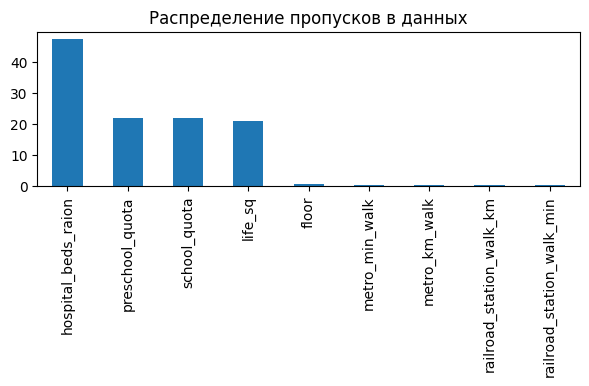

In [47]:
cols_with_null.plot(
    kind='bar',
    figsize=(7, 2),
    title='Распределение пропусков в данных'
);

На диаграмме мы видим те же соотношения, что и раньше, но представленные в удобном для визуального восприятия формате. Из неё отчётливо видно, что число пропусков в столбце hospital_beds_raion превышает 45 %. Также мы видим признаки с числом пропусков близ 0.

ТЕПЛОВАЯ КАРТА ПРОПУСКОВ 

Ещё один распространённый способ визуализации пропусков — тепловая карта.
Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

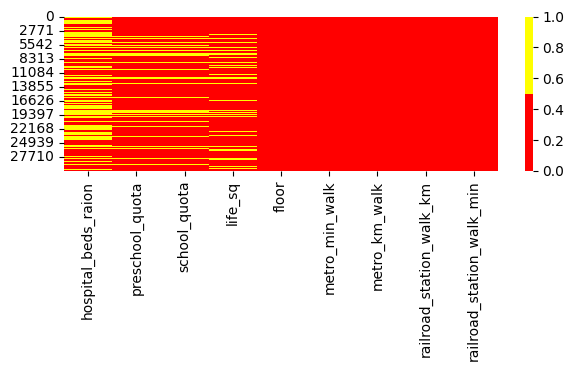

In [48]:
colors = ['red', 'yellow'] 
fig = plt.figure(figsize=(7, 2))

cols = cols_with_null.index

ax = sns.heatmap(
    data=sber_data[cols].isnull(),
    cmap=sns.color_palette(colors)
);

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что признаки preschool_quota и school_quota очень сильно связаны друг с другом по части пропусков: во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).

# Методы обработки пропущенных значений (практики в DATA SCIENCE)

1. Отбрасывание записей и признаков
<br>Это самая простая техника и предполагает простое удаление призаков содержащих пропуски NAN. Здесь важно правильно выбрать ось удаления. Если мы удалим слишком много строк, то есть риск потерять важные данные. Если удалить много столбцов, то можно потерять важные признаки.

Специалисты советуют следующий подход по удалению:
* Если в СТОЛБЦАХ более 30-40 % пропусков, то такие столбцы подлежат удалению. В остальных случаях берутся к удалению строки или они помечаются опредленным образом NO DATA, ?, какими-то константами.

Для удаления строк и столбцов используется метод dropna(), позволяющий удалять пропуски с тонкой настройкой.

<br>Основные параметры метода:

* axis — ось, по которой производится удаление (по умолчанию 0 — строки).
* how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 
* thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем n - 2 (минус 2), где n — число признаков (если axis=0). Удаляем только те признаки, в которых есть не пустых два значения.

In [49]:
# Копия, чтобы не трогать изначальные данные
drop_data = sber_data.copy()
# Задаем порог в 70 % (0.7), т.е удаляем столбцы в которых более 30 процентов пропусков! 
# Или если считать наоборот, мы будет оставлять столбцы где минимум 70 % данных
thresh = drop_data.shape[0]*0.7
# Axis = 1 удаляем столбцы
# Примечание. Начиная с версии pandas 1.5.0 в методе dropna() запрещено комбинировать использование параметров how и thresh. 
drop_sber_data = drop_data.dropna(thresh=thresh, axis=1)
# Axis = 0 удаляем оставшиеся строки
drop_sber_data = drop_sber_data.dropna(how='any', axis=0)
drop_sber_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

2. Заполнение недостающих значений
<br>Другой подход говорит о том, чтобы заполнить пропущенные значения константами. Чаще всего пустые значения заменяют средним/медианой/модой для числовых признаков.
<br>Модальным значением для категориальных признаков или unknown

Для правильного заполнения данных иногда требуется определить распределение признаков. Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками.

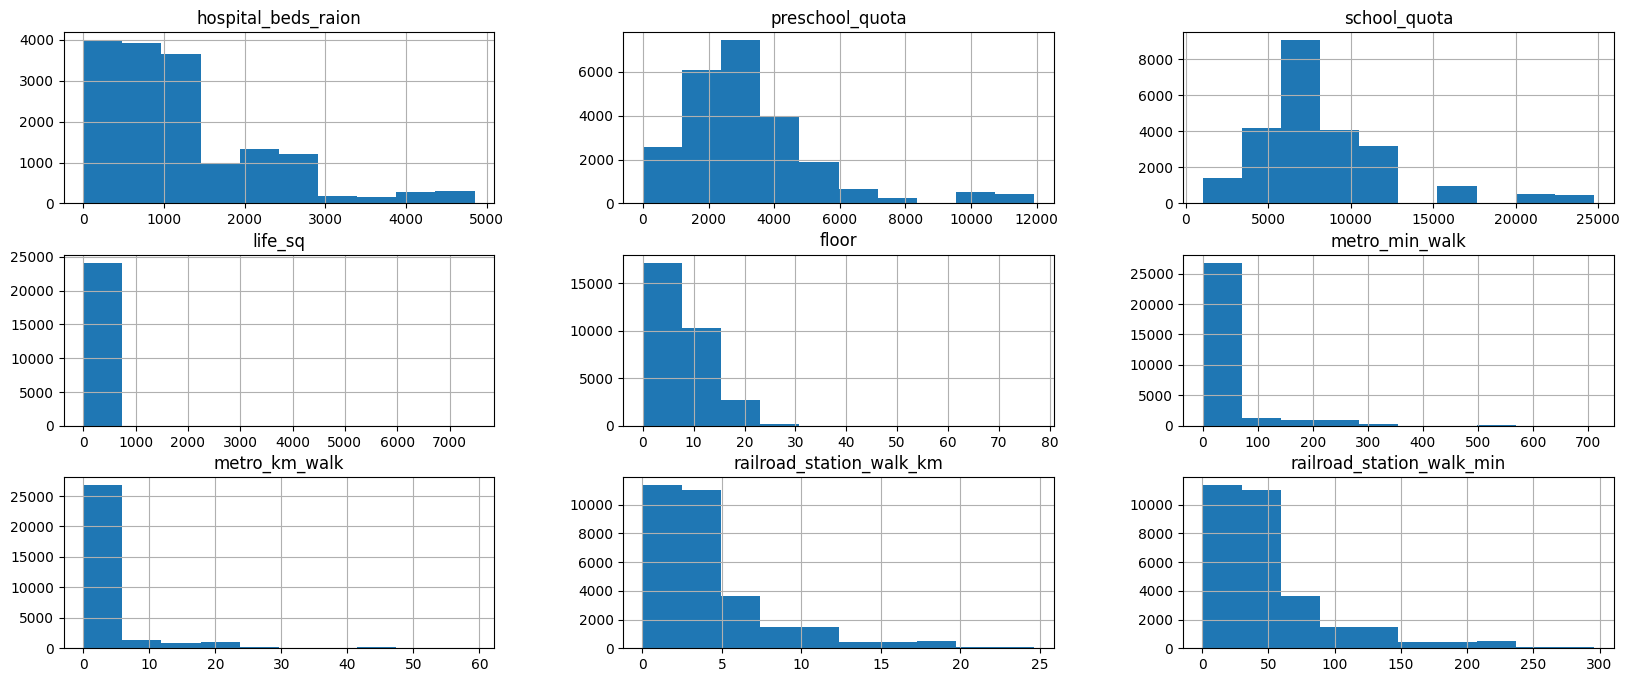

In [50]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

Несколько рекомендаций:

* Для распределений, похожих на логнормальное (получается в результате применения функции log(), только положительные значения), где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать медианное значение для таких признаков.
* Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.
* Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.
* Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!

fillna() метод pandas, который заполняет пропуски.

* Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:

In [51]:
# Копия, чтобы сохранить исходные данные
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}

fill_data = fill_data.fillna(value=values)
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

Теперь посмотрим, как изменились признаки

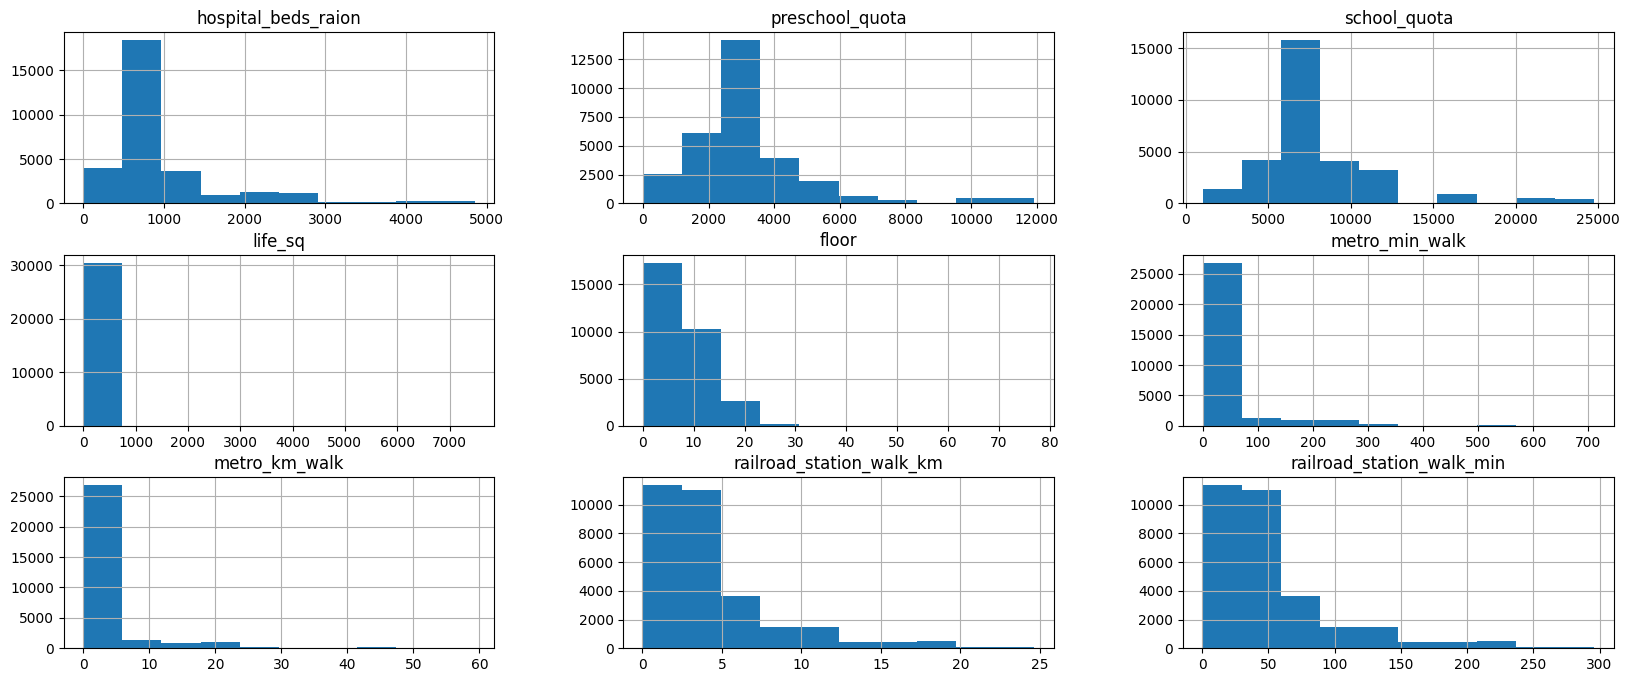

In [52]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

3. Заполнение недостающих значений с добавлением признака-индикатора
<br>Добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в этом месте были пропуски. Это место в столбце будет помечаться как True. Эта эвристика пытается, снизить влияние искажения призкана указав модели места где мы "нафантазировали" данные.
<br>Идея состоит в том, чтобы модель машинного обучения (если это заложено в нее) используя эти данные видела бы, что в этом месте были изменения и меньше бы доверяла этим данным, как бы сглаживая результат работы.

In [53]:
# Создание копии, для сохранения исходных данных
indicator_data = sber_data.copy()

# в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    # создаем новый признак-индикатор как col_was_null (c припиской)
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
    
# создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}

# заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(value=values)

# выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

Иногда такие фишки действительно работают, иногда не дают эффекта, а иногда и вовсе могут ухудшить результат обучения и затруднить процесс обучения.
<br>Когда мы добавляем признаки-индикаторы, мы повышаем размерность наших данных. Теперь представьте, что столбцов с пропусками сотня, по паре штук в каждом. 
<br>Не нужно знать высшую математику, чтобы понять, что в таком случае мы увеличим размерность исходной таблицы ещё на сотню и 99 % строк этих столбцов будут заполнены нулями (False)

4. Комбинированные методы
<br>Известно, что комбинация методов может быть более эффективной, чем использование какого-то одного метода.
* удалить столбцы, в которых более 30 % пропусков
* удалить записи, в которых более 2 пропусков одновременно
* заполнить оставшиеся ячейки константами

In [54]:
# Чтобы сохранить исходники
combine_data = sber_data.copy()

# Число столбцов
n = combine_data.shape[0]
# Граница пропусков (70 %)
thresh = n * 0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)
#combine_data = combine_data.dropna(how='any', axis=1)

# Отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] # число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)
#combine_data = combine_data.dropna(how='any', axis=0)

values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}

combine_data = combine_data.fillna(values)
combine_data.isnull().mean()


id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [55]:
sber_data.isnull().sum()

id                      0
full_sq                 0
life_sq              6383
floor                 167
sub_area                0
                     ... 
theater_km              0
museum_km               0
ecology                 0
mosque_count_1000       0
price_doc               0
Length: 61, dtype: int64

# Задание 4.6
Вам предоставлен файл test_data.csv. Прочитав этот файл, вы получите вот такой DataFrame:
Ваша задача — очистить данную таблицу от пропусков следующим образом:

* Если признак имеет больше 50 % пропущенных значений, удалите его.
* Для оставшихся данных: если в строке более двух пропусков, удалите строку.
* Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой.

In [56]:
# import pandas as pd

# df = pd.read_csv('test_data.csv', sep=',')
# #print(df)
# #print()

# # Если признак имеет больше 50 % пропущенных значений, удалите его.
# thresh = df.shape[0] * 0.5
# drop_data = df.dropna(thresh=thresh, axis=1)
# #print(drop_data)
# #print()

# # Для оставшихся данных: если в строке более двух пропусков, удалите строку.
# drop_data = drop_data.dropna(thresh=2, axis=0)
# #print(drop_data)
# #print()

# # Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой.
# values = {
#     'one': drop_data['one'].mean(),
#     'two': drop_data['two'].mean(),
#     'three': drop_data['three'].mean(),
#     'four': drop_data['four'].mode()[0],
# }
# df = drop_data.fillna(values)
# #print(df)
# #print()

# Выбросы в данных
Типичная проболема больших данных - наличие в них выбросов.
* Выброс (аномалия) - данные которые существенно выбиваются из общего распределения и сильно отличается от других.

# Чем опасны выбросы?
Выбросами могут быть, как реальные отклонения в данных, так и просто ошибкой.
Модели — это математические методы, которые оперируют числами и пытаются подстроить зависимости в данных, чтобы выдать верный ответ. Поскольку модель обучается подстраиваясь под данные, то глобальные выбросы могут буквально "шокировать" ее. При обучении на больших данных модель будет учитывать и выбросы. В результате в нее попадают и аномалии в данных, что сильно сказывается на качестве обучения.

Чаще всего выбросы либо исключают из данных, либо корректируют их. Еще создают (если выбросов слишком много) отдельный датасет и обучают отдельную модель на нем.

# Причины появления выбросов

* Ошибка ввода данных. Как и с пропусками, здесь играет роль человеческий фактор. Ввести лишний «ноль» на клавиатуре и не заметить этого — нередкий случай.
* Ошибки отбора выборки. Когда начинающие специалисты составляют обучающую выборку для моделирования, они часто допускают ошибку, не выделив в отдельную группу часть данных. Типичный пример: смешать вместе данные об уровне жизни среднего класса, опрошенного на улице, и добавить туда людей из списка Forbes.
* Преднамеренное искажение или мошенничество. Пользователи приложения часто намеренно указывают неверные данные о себе. Например, прибавляют к своему возрасту лишнюю сотню лет, создавая головную боль дата-сайентистам.

# Методы выявления выбросов

1. Использование статистики и "здравого смысла"
<br>Это самый трудоёмкий метод, основанный на житейской логике, методе пристального взгляда и небольшом количестве статистики. Он предполагает поиск невозможных и нелогичных значений в данных.


In [57]:
# Выведем основные статистические данные о жилой площади здания
sber_data['life_sq'].describe()
# Здесь можно проследить аномалии:
# - минимальная жилая площадь 0!
# - максимальная жилая площадь жилья 7,478 кв. метров!

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [58]:
# Выведим число квартир жилай площадь которых равна 0
mask = sber_data['life_sq'] == 0
display(sber_data[mask].shape[0]) # 45 квартир (юридически это могут быть аппартаменты т.к. нет закрепленной жилой площади)

45

In [59]:
# Рассмотрим квартиры где жилая площадь более 1000 кв. метров
mask = sber_data['life_sq'] > 1_000
display(sber_data[mask]) # Одна квартира, где жилая площадь 7,478
# Тут прослеживается аномалия:
# - Общая площадь квартиры меньше чем жилая площадь. Такое по закону невозможно!

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [60]:
# Посмотрим квартиры где (теоретически) общая площадь меньше жилой
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
display(outliers.shape[0]) # Таких квартир у нас насчитывается аж 37!

37

Удалим выбросы найденные выше

In [61]:
cleaned = sber_data.drop(outliers.index, axis=0)
display(f'Результирующее число записей: {cleaned.shape[0]}')

'Результирующее число записей: 30434'

In [62]:
# Статистические данные по этажам
display(sber_data['floor'].describe())
# В данных присутствует странный показатель в максимально 77 этажей
# В Ломоносовском районе (согласно яндекс и гугл :-)) таких высотных домов нет - выброс

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [64]:
# Выведим информацию об этой квартире
mask = sber_data['floor'] > 50
display(sber_data[mask])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


In [65]:
# Поскольку выше найдена аномалия она подлежит изъятию
outlier = sber_data[sber_data['floor'] > 50]
cleaned = sber_data.drop(outlier.index, axis=0)

display(f'Результирующее число записей: {cleaned.shape[0]}')

'Результирующее число записей: 30470'

2. Межквартильный размах
<br>Отличным инструментом нахождения выбросов является визуализация. 
<br>Если признак числовой, то можно построить гистограмму или коробчатую диаграмму. 
<br>На гистограмме мы можем увидеть потенциальные выбросы как низкие далеко отстоящие от основной группы столбцов «пеньки», а на коробчатой диаграмме — точки за пределами усов

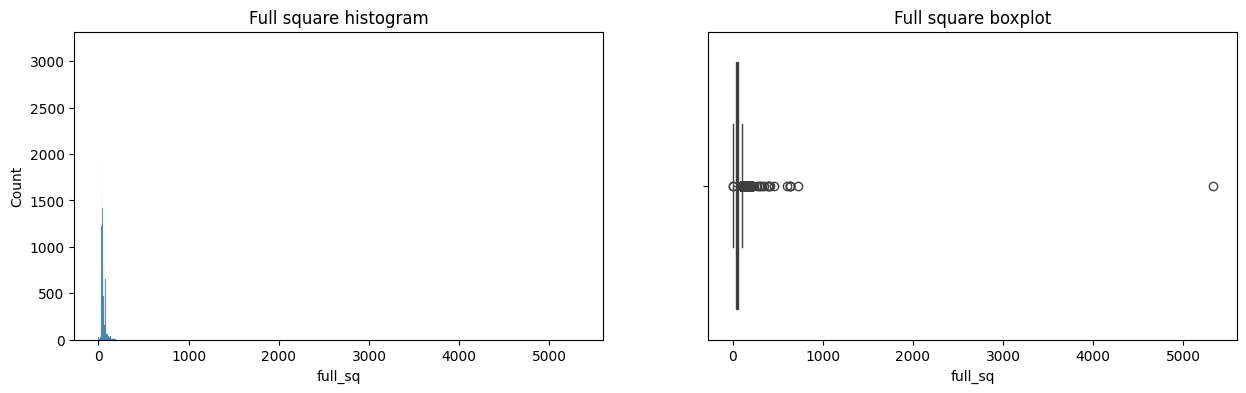

In [66]:
# Построим гистограмму и коробчатую диаграмму для признака полной площади (full_sq):
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(
    data=sber_data,
    x='full_sq',
    ax=axis[0]
)

histplot.set_title('Full square histogram');

boxplot = sns.boxplot(
    data=sber_data,
    x='full_sq',
    ax=axis[1]
)

boxplot.set_title('Full square boxplot');

Врага нужно знать в лицо! Именно так выглядят типичные графики распределений с выбросами в данных. Гистограмма, реализованная в seaborn, автоматически выбирает число столбцов, необходимое для наилучшей визуализации распределения. Когда признак содержит выбивающиеся значения, число столбцов становится очень велико и в итоге получается такая «кракозябра».

По этой же причине получается сплюснутая под весом выбросов коробчатая диаграмма. Она помогает более чётко увидеть потенциальные аномалии, которые находятся за пределами усов (1.5 межквартильных размаха).

Основная масса квартир имеет общую площадь менее 250 квадратных метров, и лишь несколько невзрачных наблюдений выбиваются из этого интервала. Максимальная площадь, судя по гистограмме, превышает 5 000 квадратных метров.

Алгоритм метода:

→ вычислить 25-ый и 75-ый квантили (первый и третий квартили) — Q25 и Q75 для признака, который мы исследуем;

→ вычислить межквартильное расстояние: IQR = Q75 - Q25;

→ вычислить верхнюю и нижнюю границы Тьюки: 
* boundupper = Q25 + 1.5 * IQR

* boundlower = Q75 - 1.5 * IQR

→ найти наблюдения, которые выходят за пределы границ.

In [67]:
def outliers_iqr(data, feature):
    x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quantile_3 - quantile_1
    bound_lower = quantile_1 - (iqr * 1.5)
    bound_upper = quantile_3 + (iqr * 1.5)
    outliers = data[(x < bound_lower) | (x > bound_upper)]
    cleaned = data[(x >= bound_lower) & (x <= bound_upper)]
    return outliers, cleaned

'Число выбросов по методу Тьюки: 963'

'Результирующее число записей: 29508'

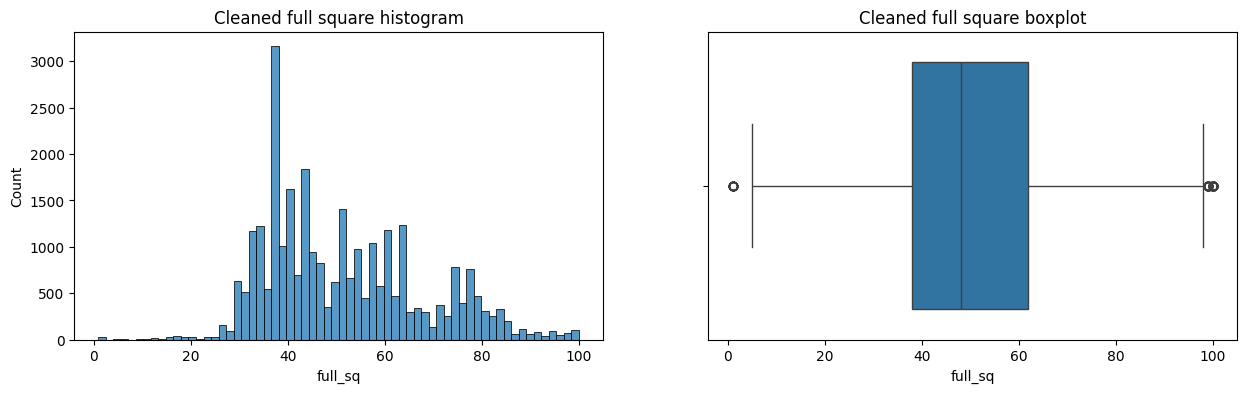

In [68]:
outliers, cleaned_sber_data = outliers_iqr(sber_data, 'full_sq')
display(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned_sber_data.shape[0]}')

# Теперь построим итоговые гистограмму и коробчатую диаграмму
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned_sber_data, x='full_sq', ax=axis[0])
histplot.set_title('Cleaned full square histogram');

boxplot = sns.boxplot(data=cleaned_sber_data, x='full_sq', ax=axis[1])
boxplot.set_title('Cleaned full square boxplot');

На первый взгляд — стерильно. Однако если присмотреться, то коробчатая диаграмма всё ещё продолжает говорить, что в данных есть одиночные выбросы с обеих сторон от границ. К тому же у нас сильно урезался диапазон жилой площади — максимальная площадь составляет около 100 кв. м. 

Причина кроется в том, что после удаления выбросов квартили рассчитываются заново по новым данным, и так оказалось, что из-за свойств распределения были снова найдены точки, которые считаются выбросами.

Классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус нормально (гистограмма должна быть похожа на колокол) и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

У нас же распределение (даже после отсечения выбросов) отличается от заявленных критериев. Оно несимметрично: правый хвост изначального распределения гораздо длиннее левого (для Москвы вполне естественны квартиры с площадью свыше 100 квадратных метров) и вовсе не колоколообразно. Попросту говоря, выбор метода поиска не оправдал себя.

Но не стоит расстраиваться! Никто не говорил, что вы должны должны ограничиваться только 1.5 межквартильных размахов. Вы можете сами подбирать число размахов влево и/или вправо и таким образом отбирать выбросы, учитывая особенности ваших данных. 

'Число выбросов по методу Тьюки: 1089'

'Результирующее число записей: 29382'

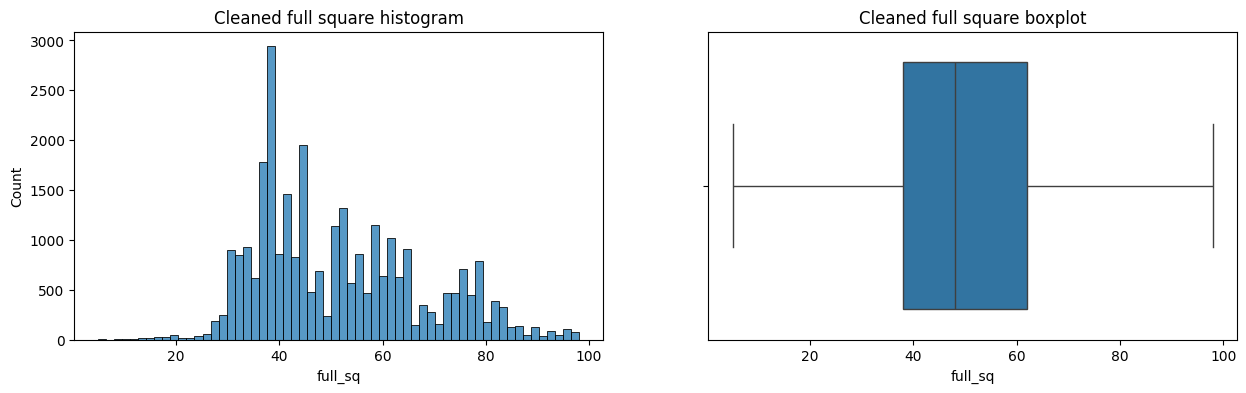

In [76]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quantile_3 - quantile_1
    bound_lower = quantile_1 - (iqr * left)
    bound_upper = quantile_3 + (iqr * right)
    outliers = data[(x < bound_lower) | (x > bound_upper)]
    cleaned = data[(x >= bound_lower) & (x <= bound_upper)]
    return outliers, cleaned

outliers, cleaned_sber_data = outliers_iqr_mod(data=sber_data, feature='full_sq', left=1.4, right=1.4)
display(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned_sber_data.shape[0]}')

# Теперь построим итоговые гистограмму и коробчатую диаграмму
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned_sber_data, x='full_sq', ax=axis[0])
histplot.set_title('Cleaned full square histogram');

boxplot = sns.boxplot(data=cleaned_sber_data, x='full_sq', ax=axis[1])
boxplot.set_title('Cleaned full square boxplot');

# Задание 6.2
Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

'Число выбросов по методу Тьюки: 59'

'Результирующее число записей: 30412'

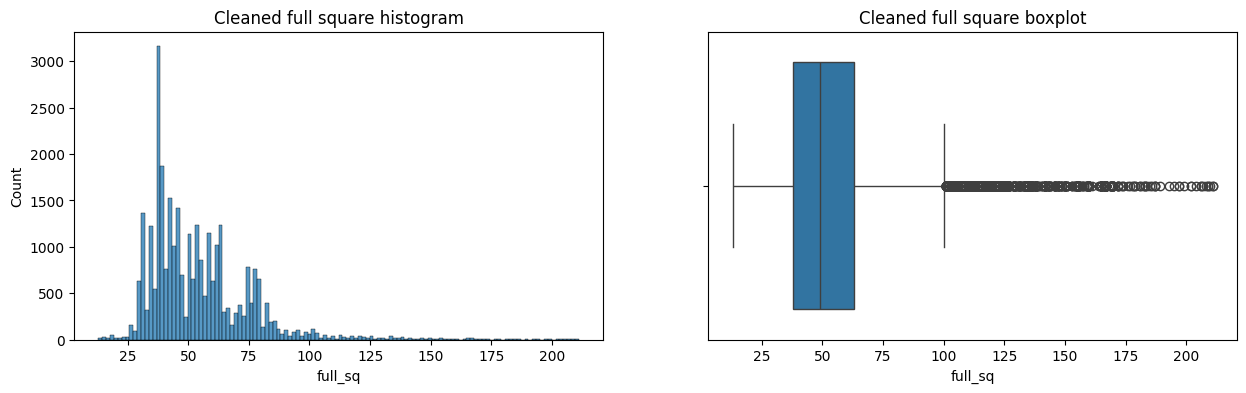

In [77]:
outliers, cleaned = outliers_iqr_mod(data=sber_data, feature='full_sq', left=1, right=6)

display(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned.shape[0]}')

# Теперь построим итоговые гистограмму и коробчатую диаграмму
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axis[0])
histplot.set_title('Cleaned full square histogram');

boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axis[1])
boxplot.set_title('Cleaned full square boxplot');

3. Метод z-отклонений (метод сигм)
<br>Метод основан на правиле 3-х сигм для нормального распредления (форма графика в виде "колокола"). Правило гласит, что если распределение является нормальным, то 99.73 % лежат в интервале (мю - 3сигма, мю 3сигма), где U (мю) — математическое ожидание (для выборки это среднее значение), а Q (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

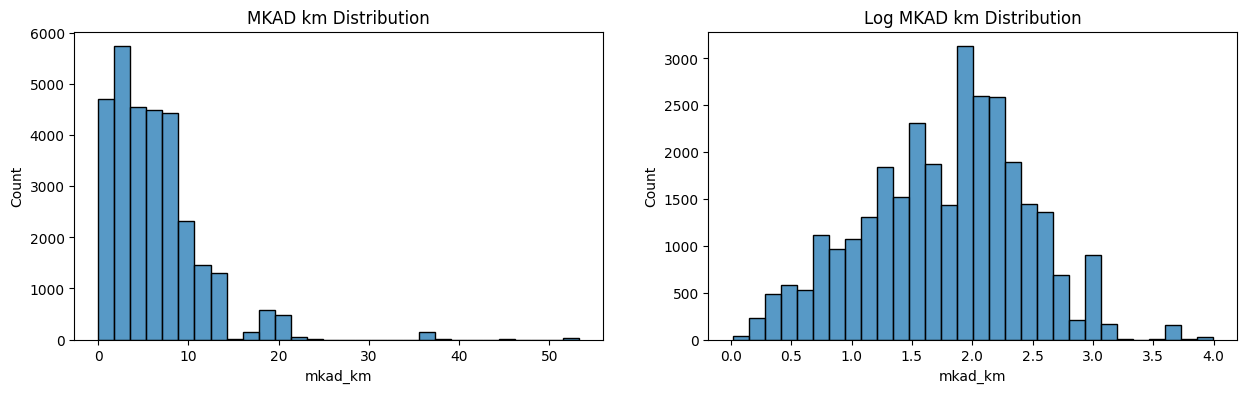

In [78]:
fig, axis = plt.subplots(1, 2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data['mkad_km'], bins=30, ax=axis[0])
histplot.set_title('MKAD km Distribution');

# Показатели левого графика равны нулю, а правила математики гласят, что логарифм не может быть нулевым или отрицательным, поэтому
# мы к нашей лог-функции прибавляем единицу.
log_metro_min_walk = np.log(sber_data['mkad_km'] + 1) 
histplot = sns.histplot(log_metro_min_walk, bins=30, ax=axis[1])
histplot.set_title('Log MKAD km Distribution');

Логнормальное распределение выгляглядит таким образом, что большинство измерений сконцентрировано близ нуля (левый верхний график), а дальше частота наблюлений постепенно падает. Если график выглядит плюс-минус подобно, то мы можем сделать логарифмирование графика и получить результаты близкие к нормальному распределению (правый вехний график), похож на купол.
<br>В этом случае мы можем применить правило "трех сигм"...

In [79]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale: # логарифмический масштаб (если установим, то будет прибавлять единицу)
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean() # мю - среднее значение
    sigma = x.std() # сигма - стандартное отклонение
    bound_lower = mu - 3 * sigma # левая граница графика (нижняя граница) U - 3Q
    bound_upper = mu + 3 * sigma # правая граница графика (верхняя граница) U + 3Q
    outliers = data[(x < bound_lower) | (x > bound_upper)]
    cleaned = data[(x >= bound_lower) & (x <= bound_upper)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(data=sber_data, feature='mkad_km', log_scale=True)
display(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned.shape[0]}')
    

'Число выбросов по методу z-отклонений: 33'

'Результирующее число записей: 30438'

In [80]:
# Найдем районы где есть выбросы
display(outliers['sub_area'].unique())

array(['Poselenie Rogovskoe', 'Poselenie Kievskij'], dtype=object)

Если посмотреть в Интернет на эти районы, то выясняется, что они являются самыми удаленными, но все же принадлежат московской области.
<br> Почему же они присутствуют среди выбросов? Дело в том, что наше "нормальное" распределение почти нормальное. В нем есть ассиметрия ввиде наличия бОльших данных в левой части от середины (левая ассиметрия). В такой ситуации нам нужно дать чуть больше сигм в правую сторону поскольку там могут находится низкочастотные значения. В итоге нужно сбалансировать наши данные.

In [81]:
# Численный показатель асимметрии можно вычислить с помощью метода skew():

display(log_metro_min_walk.skew())
# -0.14263612203024953

-0.14263612203024953

* Асимметрия распределения называется правосторонней, если она положительная:
* Асимметрия распределения называется левосторонней, если она отрицательная:

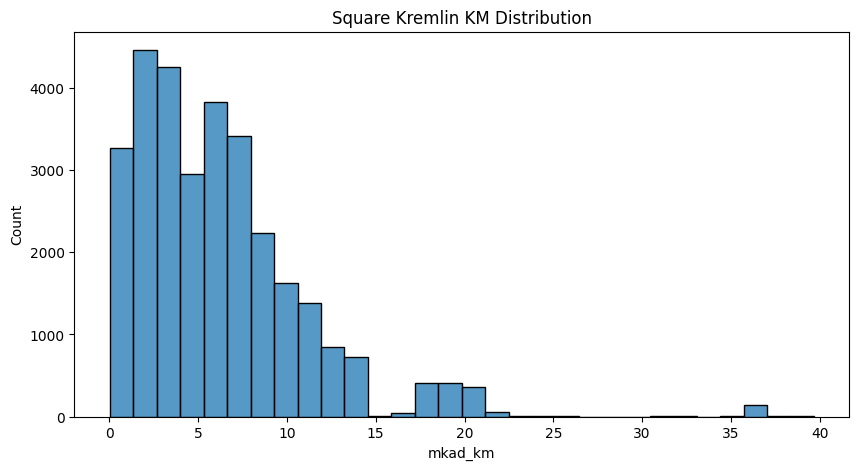

In [82]:
# Выводим результирующую гистограмму
fig = plt.figure(figsize=(10, 5))
histplot = sns.histplot(data=cleaned['mkad_km'], bins=30)
histplot.set_title('Square Kremlin KM Distribution');

Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

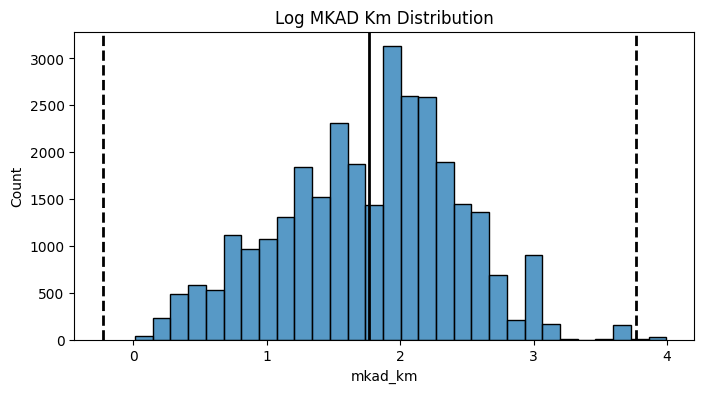

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

Итак, мы графически построили интервал метода трёх сигм поверх нашего распределения. Он показывает, какие наблюдения мы берём в интервал, а какие считаем выбросами. Легко заметить, что среднее значение (жирная вертикальная линия) находится левее моды. Это свойство распределений с левосторонней асимметрией. Также видны наблюдения, которые мы не захватили своим интервалом (небольшой «пенёк» правее верхней границы) — это и есть наши квартиры из поселений «Роговское» и «Киевский». Очевидно, что если немного (меньше чем на одну сигму) «сдвинуть» верхнюю границу вправо, то мы захватим эти наблюдения. Давайте сделаем это.

'Число выбросов по методу z-отклонений: 0'

'Результирующее число записей: 30471'

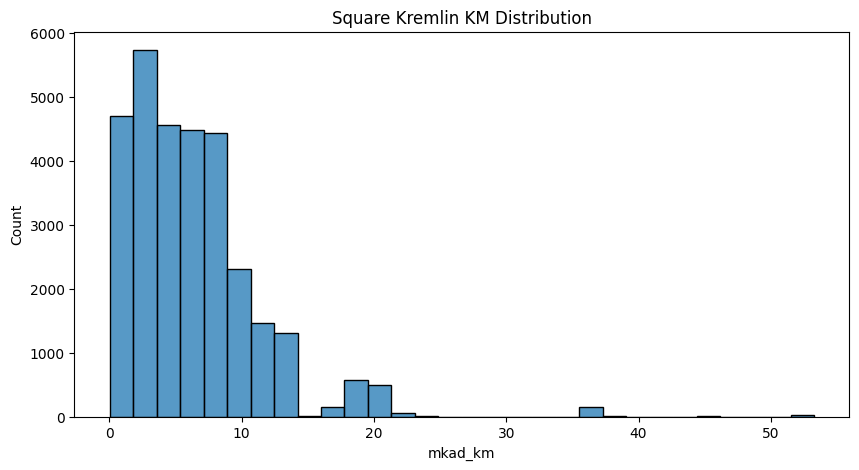

In [84]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale: # логарифмический масштаб (если установим, то будет прибавлять единицу)
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean() # мю - среднее значение
    sigma = x.std() # сигма - стандартное отклонение
    bound_lower = mu - left * sigma # левая граница графика (нижняя граница) U - 3Q
    bound_upper = mu + right * sigma # правая граница графика (верхняя граница) U + 3Q
    outliers = data[(x < bound_lower) | (x > bound_upper)]
    cleaned = data[(x >= bound_lower) & (x <= bound_upper)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(
    data=sber_data, 
    feature='mkad_km', 
    log_scale=True,
    right=3.5)

display(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned.shape[0]}')

fig = plt.figure(figsize=(10, 5))
histplot = sns.histplot(data=cleaned['mkad_km'], bins=30)
histplot.set_title('Square Kremlin KM Distribution');

РЕЗЮМЕ ПО МЕТОДАМ ПОИСКА ВЫБРОСОВ

Мы рассмотрели классические методы выявления аномальных данных. Как вы сами поняли, каждый из них имеет свои преимущества и недостатки.

* Метод ручного поиска тяжело автоматизировать, однако вы сами организовываете проверки, следите за процессом отсеивания выбросов и руководствуетесь не только статистикой, но и здравым смыслом. К тому же из всех представленных только этот метод способен выявить логические нестыковки в данных (например, общая площадь меньше жилой или число этажей более 77 в районе, где нет таких зданий). Обычно этот метод используется в комплексе с другими, чтобы удостовериться в том, что найденные данные действительно являются выбросами, и произвести логическую очистку, на которую неспособны другие методы.
* Методы межквартильного размаха и z-отклонений довольно просты в реализации и основаны на стройной математической теории, а не на эвристиках. Но это их преимущество и недостаток. Оба метода разработаны для данных, распределённых приблизительно нормально. Проблема в том, что далеко не всё в мире имеет нормальное распределение. Необходимо внимательно «рыться» в данных, совершать дополнительные преобразования, чтобы привести их хотя бы к подобию нормального распределения, либо подбирать границы методов, чтобы учитывать особенности распределений. В противном случае методы начинают считать выбросами всё, что не вписывается в жёсткие границы, и вы рискуете лишиться важных данных! Учитывайте это в своей работе и всегда проверяйте результаты.

# Задание 6.5
Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

-0.6867147547476372

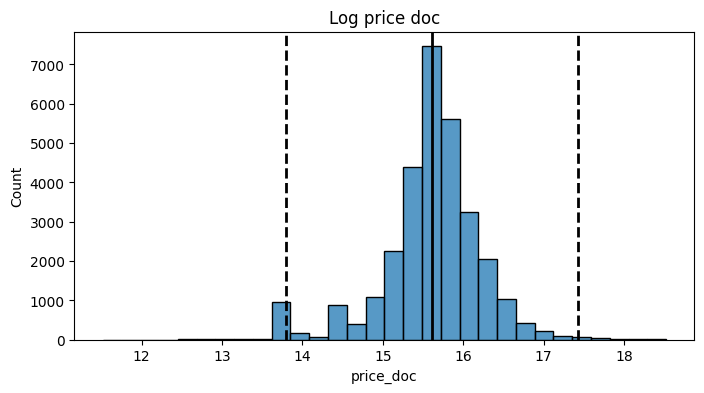

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price doc');

display(log_price_doc.skew())

!Если линия пересекает хотя бы край столбца, столбец попадает в распределение, т. е. слева все столбцы входят в распределение, а справа как раз остаются выбросы!

# Задание 6.6
Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

In [86]:
outliers, cleaned = outliers_z_score_mod(
    data=sber_data, 
    feature='price_doc', 
    log_scale=True,
    left=3 + 0.7,
    right=3 + 0.7)

display(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned.shape[0]}')

'Число выбросов по методу z-отклонений: 52'

'Результирующее число записей: 30419'

# Задание 6.7
Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [88]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quantile_3 - quantile_1
    bound_lower = quantile_1 - (iqr * left)
    bound_upper = quantile_3 + (iqr * right)
    outliers = data[(x < bound_lower) | (x > bound_upper)]
    cleaned = data[(x >= bound_lower) & (x <= bound_upper)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(
    data=sber_data, 
    feature='price_doc', 
    log_scale=True,
    left=3,
    right=3)

display(f'Число выбросов по методу Tьюки: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned.shape[0]}')

'Число выбросов по методу Tьюки: 92'

'Результирующее число записей: 30379'

# Работа с дубликатами и неинформативными признаками

Дубликаты - называются записи для которых значения (всех или большинства) признаков совпадают.

Чем опасны дубликаты? Дублирующие данные не несут никакой полезной информации и искажают статистику. Все дело в том, что модель обучения будет учитывать дублирующиеся данные и подстраиваться к ним (т.н. "переобучение"). Если дубликатов много, то это может создать большую проблему.

# Обнаружение и ликвидация дубликатов.


Способ обнаружения дубликатов зависит от того, что именно вы считаете дубликатом. Например, за дубликаты можно посчитать записи, у которых совпадают все признаки или их часть. Если в таблице есть столбец с уникальным идентификатором (id), вы можете попробовать поискать дубликаты по нему: одинаковые записи могут иметь одинаковый id.

-> Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк. Число уникальных значений вычислим с помощью метода nunique():

In [39]:
# Число уникальных id и число строк
sber_data['id'].nunique() == sber_data.shape[0] # Совпадают

True

Вроде бы всё в порядке: каждой записи в таблице соответствует свой уникальный идентификатор. Но это ещё не означает, что в таблице нет дубликатов!

Для того, чтобы отследить дубликаты можно воспользоваться методом dublicated(), который возвращает булевую маску для фильтрации. Для записей у которых совпадают признаки, которые переданы методу, он возвращает True, для остальных False. 

У метода есть параметр subset — список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

-> Найдём число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 

Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию. Результат заносим в переменную sber_duplicates. Выведем число строк в результирующем DataFrame:

In [40]:
# Cоздаем список столбцов без столбца id, т.к. в противном случае для метода duзlicated() все данные будут уникальны.
dubl_columns = list(sber_data.columns)
dubl_columns.remove('id')

# Получаем маску-series (True если есть дубль, False если нет)
mask = sber_data.duplicated(subset=dubl_columns)
# Подставляем нашу маску в датафрейм и производим фильтрацию на дубликаты
sber_dublicates = sber_data[mask]
display(f'Число найденных дубликатов: {sber_dublicates.shape[0]}')

'Число найденных дубликатов: 562'

Теперь необходимо избавиться от дубликатов. Для этого нужно воспользоваться методом drop_dublicates(), который удаляет повторяющиеся записи из таблицы.

In [41]:
# Удаляем повторы получаем очищенную копию датафрейма
sber_dedudupped = sber_data.drop_duplicates(subset=dubl_columns)
display(f'Результирующее число записей: {sber_dedudupped.shape[0]}')

'Результирующее число записей: 29909'

* Неинформативные признаки  - бОльшая часть строк с одинаковыми значениями (например пол клиента в мужском барбершопе) либо наоборот бОльшая часть строк с уникальными значениями (например ID, телефон клиента);
- Чем опасны неинформативные признаки? Они не несут ценной для модели обучения информации, а лишь засоряют таблицу и увеличивают размерность данных. 
- Как итог: время обучения модели возрастает, а качество обучения падает.
<br> Чаще всего от таких признаков стараются избавиться или как-то преобразовать.

# Обнаружение и ликвидация неинформативных признаков.

Во-первых нужно задаться неким порогом, когда мы считаем признак неинформативным. Часто используют пороги в 0.95 и 0.99. Что означает: признак неинформативен, если в нем 95% (99 %) одинаковых значений или 95% (99 %) уникальны. К сожалению в pandas пока не реализованы функции поиска неинформативности, однако, можно сделать это вручную.

In [42]:
# Создаём пустой список low_information_cols, куда будем добавлять названия признаков, 
# которые мы посчитаем неинформативными
low_information_cals = []

# В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:
for col in sber_data.columns:
    # Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.
    top_freq = sber_data[col].value_counts(normalize=True).max()
    # Рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений 
    # в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count().
    unique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # Cравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных признаков, если условие истинно.
    if top_freq > 0.95:
        low_information_cals.append(col)
        display(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if unique_ratio > 0.95:
        low_information_cals.append(col)
        display(f'{col}: {round(unique_ratio*100, 2)}% уникальных значений')

'id: 100.0% уникальных значений'

'oil_chemistry_raion: 99.03% одинаковых значений'

'railroad_terminal_raion: 96.27% одинаковых значений'

'nuclear_reactor_raion: 97.17% одинаковых значений'

'big_road1_1line: 97.44% одинаковых значений'

'mosque_count_1000: 98.08% одинаковых значений'

Теперь нужно удалить 6 неинформативных признаков с помощью метода drop()

In [43]:
information_sber_data = sber_data.drop(low_information_cals, axis=1)
display(f'Результирующее число признаков: {information_sber_data.shape[1]}')

'Результирующее число признаков: 55'

Примечание: Всегда следует скептически относиться к результатам, которые предоставил алгоритм поиска неинформативных признаков. В противном случае можно лишиться важных данных. 

Например, в ваших данных есть признак цены акций, которая всё время меняется. В каждый момент времени её цена уникальна, то есть число уникальных значений в столбце совпадает с размером столбца. Казалось бы, по критерию информативности это кандидат на выбывание, но если мы рассматриваем задачу предсказания спроса на эти самые акции, то очевидно, что цена — это очень важный фактор, несмотря на свою уникальность. Именно цена на акции определяет спрос на них.

# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Данные о диабете
diabetes = pd.read_csv('data/diabetes_data.csv', sep=',')
display(diabetes.head(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
5,6,103,72,32,190,37.7,0.324,55,0,Female
6,1,71,48,18,76,20.4,0.323,22,0,Female
7,0,117,0,0,0,33.8,0.932,44,0,Female
8,4,154,72,29,126,31.3,0.338,37,0,Female
9,5,147,78,0,0,33.7,0.218,65,0,Female


Информация о датасете:

Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (вес в кг / рост в метрах ** 2) (**2 в степени 2)

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

# Предварительный анализ

In [2]:
# Предварительно обработаем категориальные признаки
for col in diabetes.columns:
    if col not in ['Outcome', 'Pregnancies', 'Gender', 'DiabetesPedigreeFunction', 'Age']:
        diabetes[col] = diabetes[col].replace(0, np.nan)


In [3]:
# или
l_func = lambda x: np.nan if x == 0 else x

diabetes['Insulin'] = diabetes['Insulin'].apply(l_func)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(l_func)
diabetes['Pregnancies'] = diabetes['Pregnancies'].apply(l_func)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(l_func)
diabetes['BMI'] = diabetes['BMI'].apply(l_func)
diabetes['Glucose'] = diabetes['Glucose'].apply(l_func)

In [4]:
# Предварительный анализ
cols_diab_null_percent = diabetes.isnull().mean() * 100
mask = cols_diab_null_percent > 0
cols_diab_with_null = cols_diab_null_percent[mask].sort_values(ascending=False)
display(cols_diab_with_null)

Insulin          48.843188
SkinThickness    29.820051
Pregnancies      14.395887
BloodPressure     4.627249
BMI               1.413882
Glucose           0.642674
dtype: float64

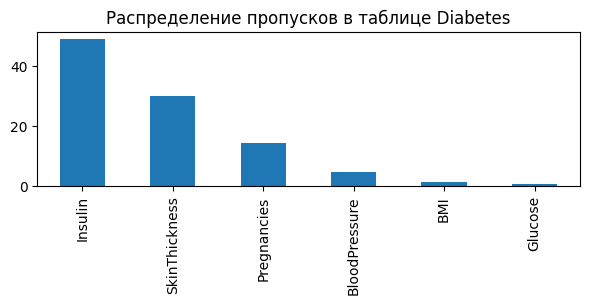

In [6]:
# Столбчатая диаграмма
cols_diab_with_null.plot(
    kind='bar',
    figsize=(7, 2),
    title='Распределение пропусков в таблице Diabetes'
);

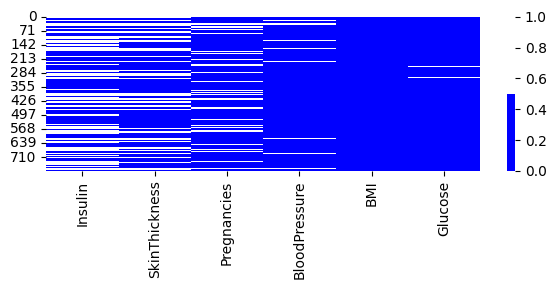

In [7]:
# Тепловая карта
colors = ['blue', 'white']
fig = plt.figure(figsize=(7,2))

cols = cols_diab_with_null.index

ax = sns.heatmap(
    data=diabetes[cols].isnull(),
    cmap=sns.color_palette(colors)
);

# Поиск и удаление дубликатов

# Задание 8.1
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [8]:
# Поиск ----
duble_cols = list(diabetes.columns)

mask = diabetes.duplicated(subset=duble_cols)
diabetes_dublicates = diabetes[mask]
display(f'Число найденных дубликатов: {diabetes_dublicates.shape[0]}')

'Число найденных дубликатов: 10'

In [9]:
# Удаление ----
diabetes_dedupped = diabetes.drop_duplicates(subset=duble_cols)
display(f'Результат очистки от дубликатов: {diabetes_dedupped.shape[0]}')

'Результат очистки от дубликатов: 768'

# Поиск неинформативных признаков в данных

In [10]:
# Функция поиска неинформативных признаков
def find_uninform_features(data, percent=0.95):
    # Создаём пустой список low_information_cols, куда будем добавлять названия признаков, 
    # которые мы посчитаем неинформативными
    low_information_cals = []

    # В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:
    for col in data.columns:
        # Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.
        top_freq = data[col].value_counts(normalize=True).max()
        # Рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений 
        # в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count().
        unique_ratio = data[col].nunique() / data[col].count()
        # Cравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных признаков, если условие истинно.
        if top_freq > percent:
            low_information_cals.append(col)
            display(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
        if unique_ratio > percent:
            low_information_cals.append(col)
            display(f'{col}: {round(unique_ratio*100, 2)}% уникальных значений')
    return low_information_cals

In [25]:
# Копия с которой далее буду работать
diabetes_df = diabetes_dedupped.copy()

# Задание 8.2
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: 
удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, 
которые вы нашли (без кавычек).

In [26]:
# Поиск неинформативных признаков
low_information_cals = find_uninform_features(data=diabetes_df)

'Gender: 100.0% одинаковых значений'

In [27]:
# Удаляем неинформативные признаки
diabetes_df = diabetes_df.drop(low_information_cals, axis=1)
display(f'Результирующее число записей после очистки неинформативных признаков: {diabetes_df.shape[0]}')

'Результирующее число записей после очистки неинформативных признаков: 768'

# Задание 8.3
Попробуйте найти пропуски в данных с помощью метода isnull().
Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [28]:
# Доля в столбце Insulin
display(diabetes_df.isnull().mean().round(2).sort_values(ascending=False))

Insulin                     0.49
SkinThickness               0.30
Pregnancies                 0.14
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

# Задание 8.4
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [71]:
diabetes_df_copy = diabetes_df.copy()
# Если признак имеет больше 30 % пропущенных значений, удалите его.
thresh = diabetes_df.shape[0]*0.7
diabetes_df = diabetes_df.dropna(thresh=thresh, axis=1)

display(diabetes_df.shape[1])
display(diabetes_df.shape[0])

8

768

# Задание 8.5
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [34]:
diabetes_df_copy = diabetes_df.copy()

m = diabetes_df_copy.shape[1]
diabetes_df_copy = diabetes_df_copy.dropna(thresh=m-2, axis=0)
display(diabetes_df_copy.shape[0]) # 761
display(diabetes_df_copy)

752

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,33.0,34.0,0.430,43,0
1,2.0,112.0,75.0,32.0,35.7,0.148,21,0
2,2.0,108.0,64.0,NaN,30.8,0.158,21,0
3,8.0,107.0,80.0,NaN,24.6,0.856,34,0
4,7.0,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
762,2.0,122.0,76.0,27.0,35.9,0.483,26,0
763,5.0,139.0,64.0,35.0,28.6,0.411,26,0
764,1.0,96.0,122.0,NaN,22.4,0.207,27,0
765,10.0,101.0,86.0,37.0,45.6,1.136,38,1


# Задание 8.6
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [72]:
# Создание копии, для сохранения исходных данных
indicator_data = diabetes_df_copy.copy()
    
# создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'Pregnancies': indicator_data['Pregnancies'].median(),
    'Glucose': indicator_data['Glucose'].median(),
    'BloodPressure': indicator_data['BloodPressure'].median(),
    'SkinThickness': indicator_data['SkinThickness'].median(),
    'BMI': indicator_data['BMI'].median(),
    'DiabetesPedigreeFunction': indicator_data['DiabetesPedigreeFunction'].median(),
    'Age': indicator_data['Age'].median(),
    'Outcome': indicator_data['Outcome'].median()
}

# заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(value=values)

# выводим результирующую долю пропусков
display(round(indicator_data['SkinThickness'].mean(), 1))

29.1

# Задание 8.7
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [74]:
outliers, cleaned_diabete_data = outliers_iqr(indicator_data, 'SkinThickness')
display(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned_diabete_data.shape[0]}')

'Число выбросов по методу Тьюки: 87'

'Результирующее число записей: 681'

# Задание 8.8
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [89]:
outliers, cleaned_diabete_data = outliers_z_score(
    data=indicator_data,
    feature='SkinThickness')

display(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned_diabete_data.shape[0]}')

'Число выбросов по методу z-отклонений: 4'

'Результирующее число записей: 764'

# Задание 8.9
* Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
* Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). 
- Какова разница между двумя этими числами (вычтите из первого второе)?

In [97]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, _ = outliers_iqr_mod(
    data=indicator_data,
    feature='DiabetesPedigreeFunction')

outliers_log, _ = outliers_iqr_mod(
    data=indicator_data,
    feature='DiabetesPedigreeFunction',
    log_scale=True)
display(outliers.shape[0] - outliers_log.shape[0])

29